https://www.youtube.com/watch?v=iNlZ3IU5Ffw

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("newfeatures_test14.csv")
df = df.drop(columns=['1week'])
df = df.drop(columns=['2weeks'])
df = df.drop(columns=['3weeks'])
df = df.drop(columns=['4weeks'])
df = df.drop(columns=['5weeks'])
df = df.drop(columns=['6weeks'])
df = df.drop(columns=['7weeks'])
df = df.drop(columns=['8weeks'])
df = df.drop(columns=['t'])
df = df.drop(columns=['a'])
df = df.drop(columns=['small_t'])
df = df.drop(columns=['capital_T'])
df = df.drop(columns=['Alphas'])
df = df.drop(columns=['MARK'])
df = df.drop(columns=['n'])
df = df.drop(columns=['n.1'])
df = df.drop(columns=['newMark'])

df.head()

,y,AlphaMax,new_t,payment
0,0.9,3,0,8
1,0.9,3,0,7
2,0.9,3,0,7
3,0.9,6,2,6
4,0.9,6,3,5


In [3]:
df.describe()

,y,AlphaMax,new_t,payment
count,273.000000,273.000000,273.000000,273.000000
mean,0.543590,4.450549,2.183150,2.630037
std,0.243075,1.994093,2.193609,1.612946
min,0.100000,3.000000,0.000000,1.000000
25%,0.300000,3.000000,0.000000,1.000000
50%,0.500000,3.000000,2.000000,2.000000
75%,0.800000,6.000000,4.000000,3.000000
max,0.900000,9.000000,7.000000,8.000000


In [4]:
scaler = StandardScaler()

In [5]:
df[['y_T', 'AlphaMax_T', 'new_t_T', 'payment_T']] = scaler.fit_transform(df[['y', 'AlphaMax', 'new_t', 'payment']])

In [6]:
df

,y,AlphaMax,new_t,payment,y_T,AlphaMax_T,new_t_T,payment_T
0,0.9,3,0,8,1.468947,-0.728759,-0.997060,3.335404
1,0.9,3,0,7,1.468947,-0.728759,-0.997060,2.714281
2,0.9,3,0,7,1.468947,-0.728759,-0.997060,2.714281
3,0.9,6,2,6,1.468947,0.778447,-0.083646,2.093159
4,0.9,6,3,5,1.468947,0.778447,0.373061,1.472037
...,...,...,...,...,...,...,...,...
268,0.1,3,2,2,-1.828258,-0.728759,-0.083646,-0.391330
269,0.1,3,0,2,-1.828258,-0.728759,-0.997060,-0.391330
270,0.1,3,1,2,-1.828258,-0.728759,-0.540353,-0.391330
271,0.1,3,0,2,-1.828258,-0.728759,-0.997060,-0.391330


In [7]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1 , max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(5, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('number of clusters')
    plt.ylabel('inertia')
    plt.grid(True)
    plt.show()
                

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


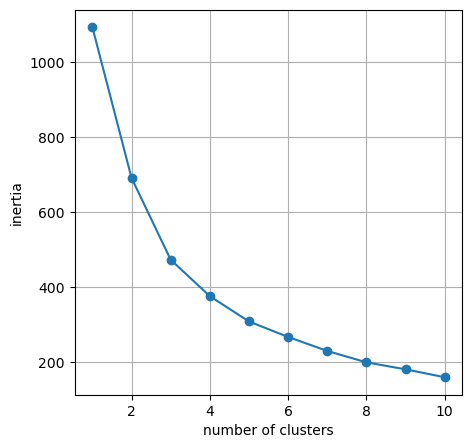

In [8]:
optimise_k_means(df[['y_T', 'AlphaMax_T', 'new_t_T', 'payment_T']], 11)

In [9]:
kmeans = KMeans(n_clusters = 5)

In [10]:
kmeans.fit(df[['y_T', 'AlphaMax_T', 'new_t_T', 'payment_T']])

KMeans(n_clusters=5)

In [11]:
df['kmeans_5'] = kmeans.labels_

In [12]:
df

,y,AlphaMax,new_t,payment,y_T,AlphaMax_T,new_t_T,payment_T,kmeans_5
0,0.9,3,0,8,1.468947,-0.728759,-0.997060,3.335404,3
1,0.9,3,0,7,1.468947,-0.728759,-0.997060,2.714281,3
2,0.9,3,0,7,1.468947,-0.728759,-0.997060,2.714281,3
3,0.9,6,2,6,1.468947,0.778447,-0.083646,2.093159,3
4,0.9,6,3,5,1.468947,0.778447,0.373061,1.472037,3
...,...,...,...,...,...,...,...,...,...
268,0.1,3,2,2,-1.828258,-0.728759,-0.083646,-0.391330,1
269,0.1,3,0,2,-1.828258,-0.728759,-0.997060,-0.391330,1
270,0.1,3,1,2,-1.828258,-0.728759,-0.540353,-0.391330,1
271,0.1,3,0,2,-1.828258,-0.728759,-0.997060,-0.391330,1


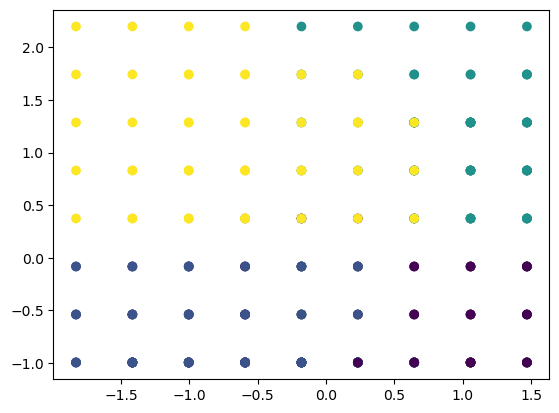

[[0.71       6.675      0.975      1.65      ]
 [0.34367816 3.         0.5862069  2.3908046 ]
 [0.76964286 6.91071429 4.75       2.05357143]
 [0.69302326 3.34883721 0.60465116 5.69767442]
 [0.36595745 3.31914894 4.55319149 1.78723404]]


In [13]:
plt.scatter(x=df['y_T'], y=df['new_t_T'],  c=df['kmeans_5'])


plt.show()
inversed = scaler.inverse_transform(kmeans.cluster_centers_)
print(inversed)


In [16]:
kmeans.predict(scaler.transform([[0.78 ,  6 , 1 , 6]]))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3])

In [37]:
for k in range(1 , 7):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['y_T', 'AlphaMax_T', 'new_t_T', 'payment_T']])
    df[f'KMeans_{k}'] = kmeans.labels_

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [16]:
df

,y,AlphaMax,new_t,payment,y_T,AlphaMax_T,new_t_T,payment_T,kmeans_5,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5,KMeans_6
0,0.9,3,0,8,1.468947,-0.728759,-0.997060,3.335404,0,0,1,0,0,0,0
1,0.9,3,0,7,1.468947,-0.728759,-0.997060,2.714281,0,0,1,0,0,0,0
2,0.9,3,0,7,1.468947,-0.728759,-0.997060,2.714281,0,0,1,0,0,0,0
3,0.9,6,2,6,1.468947,0.778447,-0.083646,2.093159,0,0,0,0,0,0,0
4,0.9,6,3,5,1.468947,0.778447,0.373061,1.472037,0,0,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,0.1,3,2,2,-1.828258,-0.728759,-0.083646,-0.391330,4,0,1,2,2,2,2
269,0.1,3,0,2,-1.828258,-0.728759,-0.997060,-0.391330,4,0,1,2,2,2,2
270,0.1,3,1,2,-1.828258,-0.728759,-0.540353,-0.391330,4,0,1,2,2,2,2
271,0.1,3,0,2,-1.828258,-0.728759,-0.997060,-0.391330,4,0,1,2,2,2,2


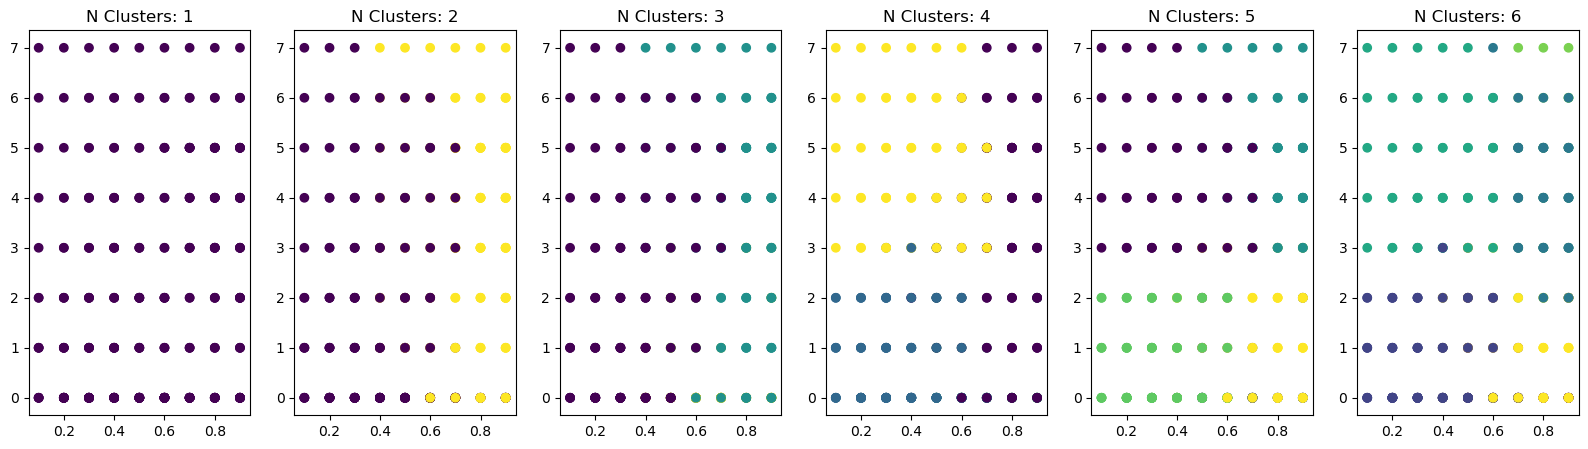

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df['y'], y=df['new_t'],   c=df[f'KMeans_{i}'])
    ax.set_title(f'N Clusters: {i}')

In [62]:
import numpy as np

def test(a,b):
    return np.linalg.norm(np.array(a)-np.array(b))

In [63]:
a = [0.58 , 5 , 4 , 2]

In [64]:
test(a,scaler.inverse_transform(kmeans.cluster_centers_)[0] ) 

2.5705221862530006

In [65]:
test(a,scaler.inverse_transform(kmeans.cluster_centers_)[1] ) 

3.3283147128805766

In [66]:
test(a,scaler.inverse_transform(kmeans.cluster_centers_)[2] ) 

4.757639511475038

In [67]:
test(a,scaler.inverse_transform(kmeans.cluster_centers_)[3] ) 

5.503946821349648

In [68]:
test(a,scaler.inverse_transform(kmeans.cluster_centers_)[4] ) 

2.864381367470389

In [69]:
test(a,scaler.inverse_transform(kmeans.cluster_centers_)[5] ) 

1.0871107524840995

In [38]:
kmeans.predict(df[['y_T', 'AlphaMax_T', 'new_t_T', 'payment_T']])

array([3, 3, 3, 3, 5, 5, 5, 4, 3, 3, 3, 5, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 1, 1, 1, 5, 5, 5, 5, 1, 5, 1, 3, 3, 3, 3, 5, 5, 5, 5,
       3, 3, 5, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 1, 1, 1, 5, 5, 5,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 5, 5, 3, 5, 3, 5, 5, 4, 4, 4, 4, 4, 4,
       4, 1, 5, 5, 5, 5, 1, 1, 1, 5, 5, 5, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 3, 4, 4, 4, 4, 4, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
dict_tmp={}

In [50]:
np.mean(df[df['kmeans_6']==5])

y             0.802703
AlphaMax      4.486486
new_t         4.270270
payment       2.891892
y_T           1.067936
AlphaMax_T    0.588662
new_t_T       0.909691
payment_T     0.162644
kmeans_6      5.000000
dtype: float64

In [122]:
np.std(df[df['kmeans_10']==9])

y             0.079575
AlphaMax      0.948957
new_t         0.922611
payment       0.739985
y_T           0.327969
AlphaMax_T    0.454130
new_t_T       0.434129
payment_T     0.459621
kmeans_6      0.543123
kmeans_10     0.000000
dtype: float64

In [18]:
for k in range(1 , 7):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['y_T', 'AlphaMax_T', 'new_t_T', 'payment_T']])
    df[f'KMeans_{k}'] = kmeans.labels_

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [19]:
df

,y,AlphaMax,new_t,payment,y_T,AlphaMax_T,new_t_T,payment_T,kmeans_5,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5,KMeans_6
0,0.9,3,0,8,1.468947,-0.728759,-0.997060,3.335404,0,0,1,0,2,0,2
1,0.9,3,0,7,1.468947,-0.728759,-0.997060,2.714281,0,0,1,0,2,0,2
2,0.9,3,0,7,1.468947,-0.728759,-0.997060,2.714281,0,0,1,0,2,0,2
3,0.9,6,2,6,1.468947,0.778447,-0.083646,2.093159,0,0,0,0,2,0,2
4,0.9,6,3,5,1.468947,0.778447,0.373061,1.472037,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,0.1,3,2,2,-1.828258,-0.728759,-0.083646,-0.391330,4,0,1,1,0,3,1
269,0.1,3,0,2,-1.828258,-0.728759,-0.997060,-0.391330,4,0,1,1,0,3,1
270,0.1,3,1,2,-1.828258,-0.728759,-0.540353,-0.391330,4,0,1,1,0,3,1
271,0.1,3,0,2,-1.828258,-0.728759,-0.997060,-0.391330,4,0,1,1,0,3,1


KeyError: 't'

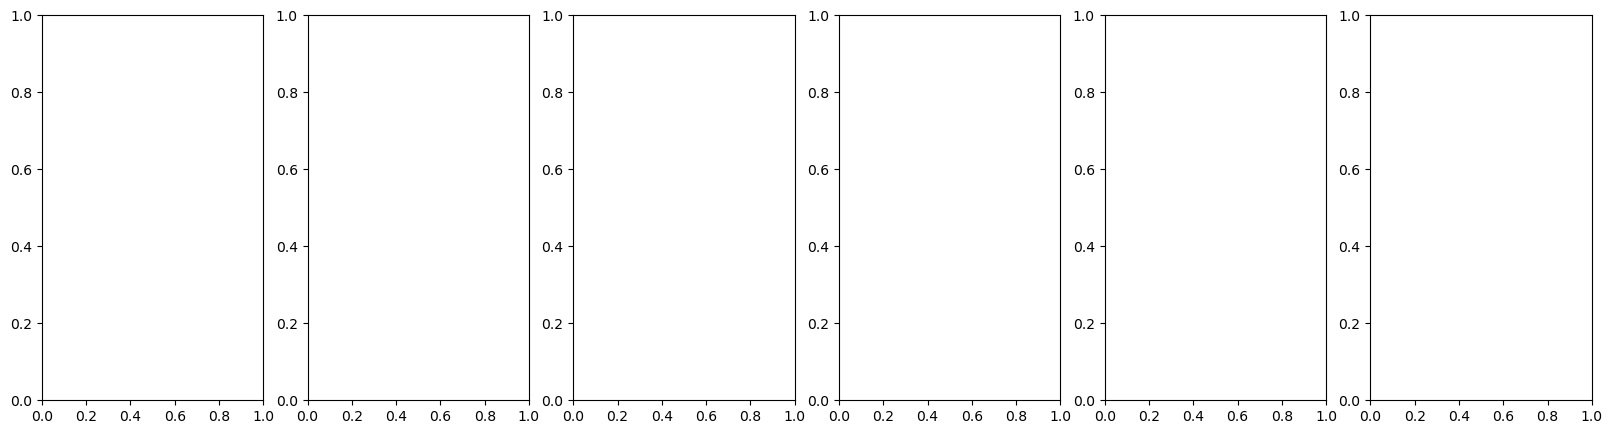

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df['y'], y=df['t'],   c=df[f'KMeans_{i}'])
    ax.set_title(f'N Clusters: {i}')